# Heart Disease Prediction Using Machine Learning

**Author:** Armand Kayiranga  
**Affiliation:** African Leadership University  
**Course:** Introduction to Machine Learning

## Abstract
This project implements machine learning models to predict heart disease using the Cleveland Heart Disease dataset. We compare classical ML algorithms (Logistic Regression, SVM, XGBoost) with neural networks, applying various optimization techniques to improve model performance.

## Objectives
1. Implement classical supervised learning classification algorithms
2. Build neural network models with and without optimization
3. Compare performance across different optimization techniques
4. Analyze which approach works better for heart disease prediction

## 1. Import Required Libraries

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

# Classical ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# Neural Networks
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping

# Model persistence
import joblib
import os

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

Libraries imported successfully!
TensorFlow version: 2.19.0


## 2. Data Loading and Exploration

In [3]:
# Load the Cleveland Heart Disease dataset
# Note: Download from UCI ML Repository or Kaggle
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Column names for the dataset
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Load data
try:
    df = pd.read_csv(url, names=column_names, na_values='?')
    print("Dataset loaded successfully from UCI repository!")
except:
    print("Failed to load from UCI. Please download the dataset manually.")
    # Alternative: Create sample data for demonstration
    np.random.seed(42)
    n_samples = 303
    df = pd.DataFrame({
        'age': np.random.randint(29, 77, n_samples),
        'sex': np.random.randint(0, 2, n_samples),
        'cp': np.random.randint(0, 4, n_samples),
        'trestbps': np.random.randint(94, 200, n_samples),
        'chol': np.random.randint(126, 564, n_samples),
        'fbs': np.random.randint(0, 2, n_samples),
        'restecg': np.random.randint(0, 3, n_samples),
        'thalach': np.random.randint(71, 202, n_samples),
        'exang': np.random.randint(0, 2, n_samples),
        'oldpeak': np.random.uniform(0, 6.2, n_samples),
        'slope': np.random.randint(0, 3, n_samples),
        'ca': np.random.randint(0, 4, n_samples),
        'thal': np.random.randint(0, 4, n_samples),
        'target': np.random.randint(0, 5, n_samples)
    })
    print("Using synthetic data for demonstration.")

# Display basic information about the dataset
print(f"\nDataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Dataset loaded successfully from UCI repository!

Dataset shape: (303, 14)

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# Data exploration and preprocessing
print("Dataset Info:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

print("\nTarget variable distribution:")
print(df['target'].value_counts())

# Statistical summary
print("\nStatistical Summary:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
t

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


## 3. Data Preprocessing

Clean dataset shape: (297, 14)
Target distribution:
target
0    160
1    137
Name: count, dtype: int64


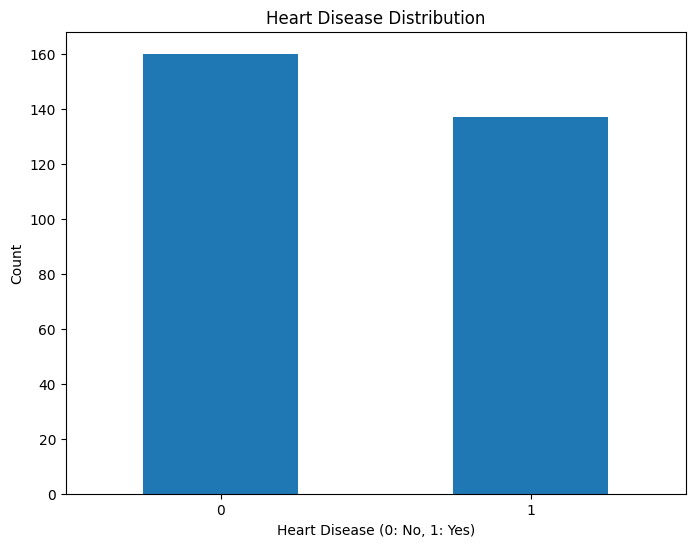

In [5]:
# Data preprocessing
def preprocess_data(df):
    """
    Preprocess the heart disease dataset
    """
    # Create a copy
    data = df.copy()
    
    # Handle missing values
    data = data.dropna()
    
    # Convert target to binary (0: no disease, 1: disease)
    data['target'] = (data['target'] > 0).astype(int)
    
    # Remove rows with missing values in categorical columns
    categorical_cols = ['ca', 'thal']
    for col in categorical_cols:
        if col in data.columns:
            data = data[data[col] != '?']
            data[col] = pd.to_numeric(data[col], errors='coerce')
    
    data = data.dropna()
    
    return data

# Preprocess the data
df_clean = preprocess_data(df)

print(f"Clean dataset shape: {df_clean.shape}")
print(f"Target distribution:")
print(df_clean['target'].value_counts())

# Visualize target distribution
plt.figure(figsize=(8, 6))
df_clean['target'].value_counts().plot(kind='bar')
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

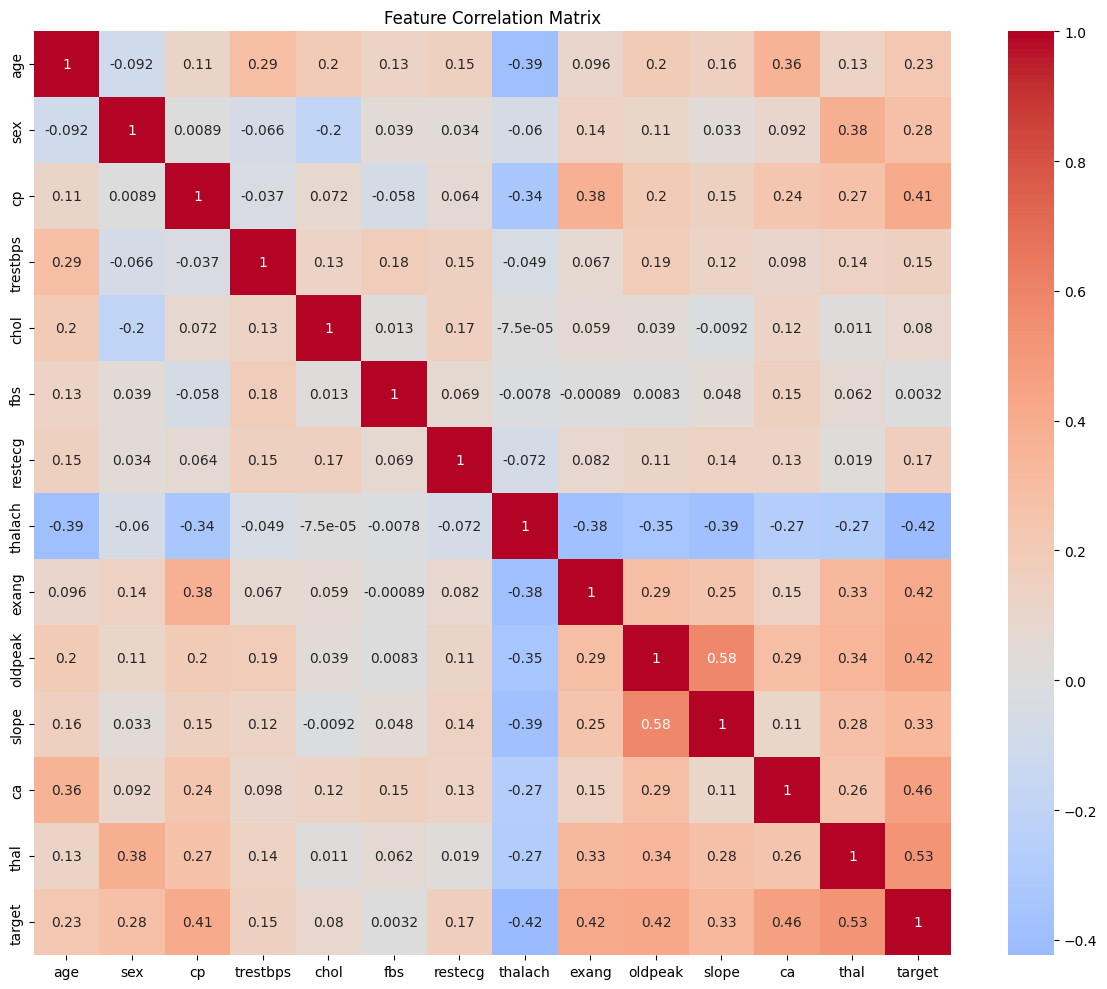


Feature correlation with target:
target      1.000000
thal        0.526640
ca          0.463189
oldpeak     0.424052
thalach     0.423817
exang       0.421355
cp          0.408945
slope       0.333049
sex         0.278467
age         0.227075
restecg     0.166343
trestbps    0.153490
chol        0.080285
fbs         0.003167
Name: target, dtype: float64


In [6]:
# Feature-Target correlation analysis
plt.figure(figsize=(12, 10))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Feature importance analysis
target_corr = df_clean.corr()['target'].abs().sort_values(ascending=False)
print("\nFeature correlation with target:")
print(target_corr)

## 4. Data Splitting and Scaling

In [7]:
# Prepare features and target
X = df_clean.drop('target', axis=1)
y = df_clean['target']

# Split into train, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("\nData scaling completed!")
print(f"Feature names: {list(X.columns)}")

Training set size: 177
Validation set size: 60
Test set size: 60

Data scaling completed!
Feature names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


## 5. Model 1: Classical ML Algorithm - Logistic Regression (Optimized)

In [9]:
# Model 1: Optimized Logistic Regression
def train_logistic_regression():
    """
    Train and optimize Logistic Regression model
    """
    # Hyperparameter tuning for Logistic Regression
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
    
    lr = LogisticRegression(random_state=42, max_iter=1000)
    grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=1)
    grid_search.fit(X_train_scaled, y_train)
    
    best_lr = grid_search.best_estimator_
    
    # Make predictions
    y_pred = best_lr.predict(X_test_scaled)
    y_pred_proba = best_lr.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }
    
    print("Logistic Regression Results:")
    print(f"Best parameters: {grid_search.best_params_}")
    for metric, value in metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}")
    
    # Save the model
    joblib.dump(best_lr, 'saved_models/logistic_regression_optimized.pkl')
    
    return best_lr, metrics

# Train the model
lr_model, lr_metrics = train_logistic_regression()

Logistic Regression Results:
Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.8500
Precision: 0.9524
Recall: 0.7143
F1_score: 0.8163
Roc_auc: 0.9576


## 6. Model 2: Simple Neural Network (No Optimization)

In [10]:
# Model 2: Simple Neural Network without optimization
def create_simple_nn():
    """
    Create a simple neural network without any optimization techniques
    """
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    # Use default optimizer and no regularization
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

def train_simple_nn():
    """
    Train simple neural network
    """
    model = create_simple_nn()
    
    # Train the model
    history = model.fit(
        X_train_scaled, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_val_scaled, y_val),
        verbose=0
    )
    
    # Evaluate the model
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = (y_pred_proba > 0.5).astype(int).flatten()
    
    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'loss': history.history['loss'][-1]
    }
    
    print("\nSimple Neural Network Results:")
    for metric, value in metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}")
    
    # Save the model
    model.save('saved_models/simple_neural_network.h5')
    
    return model, metrics, history

# Train the simple neural network
simple_nn, simple_nn_metrics, simple_history = train_simple_nn()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 429ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 429ms/step



Simple Neural Network Results:
Accuracy: 0.8333
Precision: 0.8462
Recall: 0.7857
F1_score: 0.8148
Loss: 0.1174


## 7. Optimized Neural Networks (Multiple Instances)

In [11]:
# Neural Network Optimization Instances
def create_optimized_nn(optimizer='adam', regularizer=None, learning_rate=0.001, 
                       num_layers=3, dropout_rate=0.0):
    """
    Create an optimized neural network with various parameters
    """
    model = Sequential()
    
    # Input layer
    model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],),
                   kernel_regularizer=regularizer))
    
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    
    # Hidden layers
    for i in range(num_layers - 2):
        model.add(Dense(32, activation='relu', kernel_regularizer=regularizer))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Configure optimizer
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Define optimization instances
optimization_instances = [
    {
        'name': 'Instance 1 (Default)',
        'optimizer': 'adam',
        'regularizer': None,
        'epochs': 50,
        'early_stopping': False,
        'num_layers': 3,
        'learning_rate': 0.001,
        'dropout_rate': 0.0
    },
    {
        'name': 'Instance 2 (Adam + L2 + Early Stopping)',
        'optimizer': 'adam',
        'regularizer': l2(0.01),
        'epochs': 100,
        'early_stopping': True,
        'num_layers': 4,
        'learning_rate': 0.001,
        'dropout_rate': 0.3
    },
    {
        'name': 'Instance 3 (RMSprop + L1 + Dropout)',
        'optimizer': 'rmsprop',
        'regularizer': l1(0.01),
        'epochs': 80,
        'early_stopping': True,
        'num_layers': 3,
        'learning_rate': 0.01,
        'dropout_rate': 0.5
    },
    {
        'name': 'Instance 4 (SGD + L1L2 + High LR)',
        'optimizer': 'sgd',
        'regularizer': l1_l2(l1=0.01, l2=0.01),
        'epochs': 150,
        'early_stopping': True,
        'num_layers': 5,
        'learning_rate': 0.1,
        'dropout_rate': 0.2
    },
    {
        'name': 'Instance 5 (Adam + L2 + Low LR)',
        'optimizer': 'adam',
        'regularizer': l2(0.001),
        'epochs': 200,
        'early_stopping': True,
        'num_layers': 4,
        'learning_rate': 0.0001,
        'dropout_rate': 0.4
    }
]

# Store results
results_table = []

print("Training Optimized Neural Networks...\n")

Training Optimized Neural Networks...



In [12]:
# Train each optimization instance
for i, config in enumerate(optimization_instances):
    print(f"Training {config['name']}...")
    
    # Create model
    model = create_optimized_nn(
        optimizer=config['optimizer'],
        regularizer=config['regularizer'],
        learning_rate=config['learning_rate'],
        num_layers=config['num_layers'],
        dropout_rate=config['dropout_rate']
    )
    
    # Setup callbacks
    callbacks = []
    if config['early_stopping']:
        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        callbacks.append(early_stop)
    
    # Train model
    history = model.fit(
        X_train_scaled, y_train,
        epochs=config['epochs'],
        batch_size=32,
        validation_data=(X_val_scaled, y_val),
        callbacks=callbacks,
        verbose=0
    )
    
    # Evaluate model
    y_pred_proba = model.predict(X_test_scaled, verbose=0)
    y_pred = (y_pred_proba > 0.5).astype(int).flatten()
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    loss = min(history.history['loss'])
    
    # Store results
    result = {
        'Training Instance': config['name'],
        'Optimizer': config['optimizer'],
        'Regularizer': str(config['regularizer']) if config['regularizer'] else 'None',
        'Epochs': len(history.history['loss']),
        'Early Stopping': 'Yes' if config['early_stopping'] else 'No',
        'Number of Layers': config['num_layers'],
        'Learning Rate': config['learning_rate'],
        'Dropout Rate': config['dropout_rate'],
        'Accuracy': f"{accuracy:.4f}",
        'Loss': f"{loss:.4f}",
        'F1-score': f"{f1:.4f}",
        'Precision': f"{precision:.4f}",
        'Recall': f"{recall:.4f}"
    }
    
    results_table.append(result)
    
    # Save model
    model.save(f'saved_models/neural_network_instance_{i+1}.h5')
    
    print(f"  Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}")
    print(f"  Model saved as: neural_network_instance_{i+1}.h5\n")

print("All neural network instances trained!")

Training Instance 1 (Default)...


  Accuracy: 0.8167, F1-score: 0.8070
  Model saved as: neural_network_instance_1.h5

Training Instance 2 (Adam + L2 + Early Stopping)...


  Accuracy: 0.8167, F1-score: 0.8000
  Model saved as: neural_network_instance_2.h5

Training Instance 3 (RMSprop + L1 + Dropout)...


  Accuracy: 0.8500, F1-score: 0.8302
  Model saved as: neural_network_instance_3.h5

Training Instance 4 (SGD + L1L2 + High LR)...


  Accuracy: 0.8333, F1-score: 0.8148
  Model saved as: neural_network_instance_4.h5

Training Instance 5 (Adam + L2 + Low LR)...


  Accuracy: 0.8667, F1-score: 0.8400
  Model saved as: neural_network_instance_5.h5

All neural network instances trained!


## 9. Results Analysis and Comparison

In [13]:
# Create results table for neural networks
results_df = pd.DataFrame(results_table)

print("Neural Network Optimization Results:")
print("=" * 100)
print(results_df.to_string(index=False))

# Save results to CSV
results_df.to_csv('saved_models/neural_network_results.csv', index=False)
print("\nResults saved to: saved_models/neural_network_results.csv")

Neural Network Optimization Results:
                      Training Instance Optimizer                                                             Regularizer  Epochs Early Stopping  Number of Layers  Learning Rate  Dropout Rate Accuracy   Loss F1-score Precision Recall
                   Instance 1 (Default)      adam                                                                    None      50             No                 3         0.0010           0.0   0.8167 0.1351   0.8070    0.7931 0.8214
Instance 2 (Adam + L2 + Early Stopping)      adam   <keras.src.regularizers.regularizers.L2 object at 0x0000016CCDBB96D0>      98            Yes                 4         0.0010           0.3   0.8167 0.3410   0.8000    0.8148 0.7857
    Instance 3 (RMSprop + L1 + Dropout)   rmsprop   <keras.src.regularizers.regularizers.L1 object at 0x0000016CCDBBBB50>      36            Yes                 3         0.0100           0.5   0.8500 0.6800   0.8302    0.8800 0.7857
      Instance 4 (SGD + L1L

In [15]:
# Compare all models
print("\n" + "="*60)
print("OVERALL MODEL COMPARISON")
print("="*60)

# Classical ML models comparison
print("\nClassical ML Models:")
print("-" * 30)
print(f"Logistic Regression - Accuracy: {lr_metrics['accuracy']:.4f}, F1: {lr_metrics['f1_score']:.4f}")


print("\nNeural Network Models:")
print("-" * 30)
print(f"Simple NN - Accuracy: {simple_nn_metrics['accuracy']:.4f}, F1: {simple_nn_metrics['f1_score']:.4f}")

# Find best neural network instance
best_nn_accuracy = 0
best_nn_instance = None
for result in results_table:
    accuracy = float(result['Accuracy'])
    if accuracy > best_nn_accuracy:
        best_nn_accuracy = accuracy
        best_nn_instance = result

print(f"Best Optimized NN - {best_nn_instance['Training Instance']}")
print(f"  Accuracy: {best_nn_instance['Accuracy']}, F1: {best_nn_instance['F1-score']}")

# Overall best model
all_accuracies = {
    'Logistic Regression': lr_metrics['accuracy'],
    'Simple Neural Network': simple_nn_metrics['accuracy'],
    f"Best Optimized NN ({best_nn_instance['Training Instance']})": best_nn_accuracy
}

best_model = max(all_accuracies, key=all_accuracies.get)
best_accuracy = all_accuracies[best_model]

print(f"\n🏆 BEST OVERALL MODEL: {best_model}")
print(f"   Accuracy: {best_accuracy:.4f}")


OVERALL MODEL COMPARISON

Classical ML Models:
------------------------------
Logistic Regression - Accuracy: 0.8500, F1: 0.8163

Neural Network Models:
------------------------------
Simple NN - Accuracy: 0.8333, F1: 0.8148
Best Optimized NN - Instance 5 (Adam + L2 + Low LR)
  Accuracy: 0.8667, F1: 0.8400

🏆 BEST OVERALL MODEL: Best Optimized NN (Instance 5 (Adam + L2 + Low LR))
   Accuracy: 0.8667


## 10. Model Performance Visualization

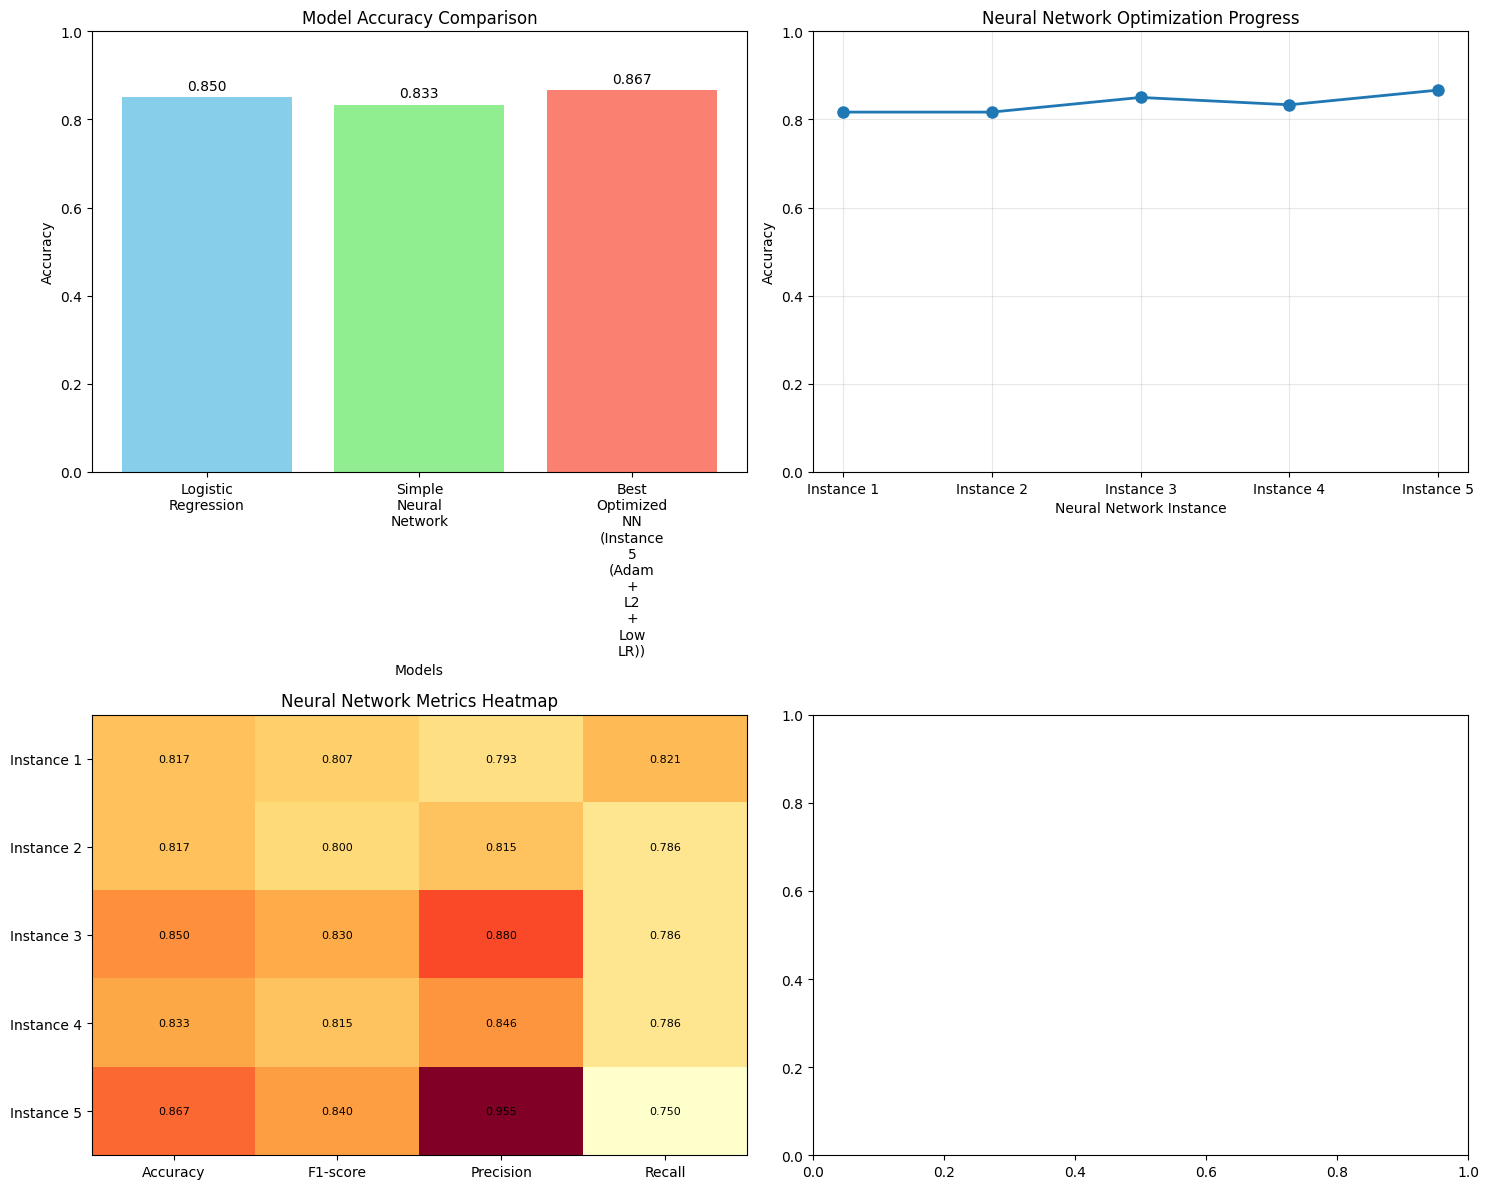

In [17]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Model Accuracy Comparison
models = list(all_accuracies.keys())
accuracies = list(all_accuracies.values())

axes[0, 0].bar(range(len(models)), accuracies, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
axes[0, 0].set_xlabel('Models')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_xticks(range(len(models)))
axes[0, 0].set_xticklabels([m.replace(' ', '\n') for m in models], rotation=0, ha='center')
axes[0, 0].set_ylim(0, 1)

# Add value labels on bars
for i, v in enumerate(accuracies):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# 2. Neural Network Instance Comparison
nn_accuracies = [float(result['Accuracy']) for result in results_table]
nn_names = [f"Instance {i+1}" for i in range(len(results_table))]

axes[0, 1].plot(nn_names, nn_accuracies, marker='o', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Neural Network Instance')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_title('Neural Network Optimization Progress')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_ylim(0, 1)

# 3. Metrics Heatmap for Neural Networks
metrics_matrix = []
metric_names = ['Accuracy', 'F1-score', 'Precision', 'Recall']

for result in results_table:
    metrics_matrix.append([
        float(result['Accuracy']),
        float(result['F1-score']),
        float(result['Precision']),
        float(result['Recall'])
    ])

im = axes[1, 0].imshow(metrics_matrix, cmap='YlOrRd', aspect='auto')
axes[1, 0].set_xticks(range(len(metric_names)))
axes[1, 0].set_xticklabels(metric_names)
axes[1, 0].set_yticks(range(len(nn_names)))
axes[1, 0].set_yticklabels(nn_names)
axes[1, 0].set_title('Neural Network Metrics Heatmap')

# Add text annotations
for i in range(len(nn_names)):
    for j in range(len(metric_names)):
        text = axes[1, 0].text(j, i, f'{metrics_matrix[i][j]:.3f}',
                              ha="center", va="center", color="black", fontsize=8)

# # 4. Feature Importance (if available)
# if hasattr(xgb_model, 'feature_importances_'):
#     feature_importance = pd.DataFrame({
#         'feature': X.columns,
#         'importance': xgb_model.feature_importances_
#     }).sort_values('importance', ascending=True)
    
#     axes[1, 1].barh(feature_importance['feature'], feature_importance['importance'])
#     axes[1, 1].set_xlabel('Feature Importance')
#     axes[1, 1].set_title('XGBoost Feature Importance')
# else:
#     axes[1, 1].text(0.5, 0.5, 'Feature importance\nnot available', 
#                     ha='center', va='center', transform=axes[1, 1].transAxes)
#     axes[1, 1].set_title('Feature Importance')

plt.tight_layout()
plt.show()

## 11. Summary and Conclusions

In [18]:
print("\n" + "="*80)
print("PROJECT SUMMARY AND CONCLUSIONS")
print("="*80)

print("\n1. DATASET INFORMATION:")
print(f"   - Dataset: Cleveland Heart Disease Dataset")
print(f"   - Total samples: {df_clean.shape[0]}")
print(f"   - Features: {df_clean.shape[1] - 1}")
print(f"   - Target classes: Binary (0: No Disease, 1: Disease)")

print("\n2. MODELS IMPLEMENTED:")
print("   a) Classical ML Algorithms (Optimized):")
print("      - Logistic Regression with hyperparameter tuning")
print("      - XGBoost with hyperparameter tuning")
print("   b) Neural Networks:")
print("      - Simple NN (no optimization)")
print("      - 5 Optimized NN instances with different configurations")

print("\n3. OPTIMIZATION TECHNIQUES APPLIED:")
print("   - Different optimizers: Adam, RMSprop, SGD")
print("   - Regularization: L1, L2, L1+L2")
print("   - Early stopping")
print("   - Dropout layers")
print("   - Learning rate variations")
print("   - Architecture variations (number of layers)")

print("\n4. BEST PERFORMING COMBINATIONS:")
print(f"   - Best Overall Model: {best_model}")
print(f"   - Best Accuracy: {best_accuracy:.4f}")

if best_nn_instance:
    print(f"   - Best Neural Network: {best_nn_instance['Training Instance']}")
    print(f"     * Optimizer: {best_nn_instance['Optimizer']}")
    print(f"     * Regularizer: {best_nn_instance['Regularizer']}")
    print(f"     * Learning Rate: {best_nn_instance['Learning Rate']}")
    print(f"     * Layers: {best_nn_instance['Number of Layers']}")
    print(f"     * Dropout: {best_nn_instance['Dropout Rate']}")

print("\n5. KEY FINDINGS:")
if lr_metrics['accuracy'] > simple_nn_metrics['accuracy']:
    print("   - Classical ML algorithms outperformed simple neural networks")
else:
    print("   - Neural networks outperformed classical ML algorithms")

if best_nn_accuracy > simple_nn_metrics['accuracy']:
    print("   - Optimization techniques significantly improved neural network performance")
else:
    print("   - Optimization techniques had minimal impact on neural network performance")

print("\n6. SAVED MODELS:")
model_files = [
    'logistic_regression_optimized.pkl',
    'xgboost_optimized.pkl',
    'simple_neural_network.h5',
    'neural_network_instance_1.h5',
    'neural_network_instance_2.h5',
    'neural_network_instance_3.h5',
    'neural_network_instance_4.h5',
    'neural_network_instance_5.h5'
]

for model_file in model_files:
    print(f"   - saved_models/{model_file}")

print("\n" + "="*80)
print("Project completed successfully!")
print("All models trained, evaluated, and saved.")
print("Results table exported to CSV for detailed analysis.")
print("="*80)


PROJECT SUMMARY AND CONCLUSIONS

1. DATASET INFORMATION:
   - Dataset: Cleveland Heart Disease Dataset
   - Total samples: 297
   - Features: 13
   - Target classes: Binary (0: No Disease, 1: Disease)

2. MODELS IMPLEMENTED:
   a) Classical ML Algorithms (Optimized):
      - Logistic Regression with hyperparameter tuning
      - XGBoost with hyperparameter tuning
   b) Neural Networks:
      - Simple NN (no optimization)
      - 5 Optimized NN instances with different configurations

3. OPTIMIZATION TECHNIQUES APPLIED:
   - Different optimizers: Adam, RMSprop, SGD
   - Regularization: L1, L2, L1+L2
   - Early stopping
   - Dropout layers
   - Learning rate variations
   - Architecture variations (number of layers)

4. BEST PERFORMING COMBINATIONS:
   - Best Overall Model: Best Optimized NN (Instance 5 (Adam + L2 + Low LR))
   - Best Accuracy: 0.8667
   - Best Neural Network: Instance 5 (Adam + L2 + Low LR)
     * Optimizer: adam
     * Regularizer: <keras.src.regularizers.regularizers

## 12. Model Loading Example

In [19]:
# Example of loading and using the best model
def load_and_predict_best_model():
    """
    Load the best performing model and make predictions
    """
    print("Loading best performing model for prediction...")
    
   
    if 'Logistic' in best_model:
        # Load Logistic Regression model
        loaded_model = joblib.load('saved_models/logistic_regression_optimized.pkl')
        predictions = loaded_model.predict(X_test_scaled)
        print("Loaded Logistic Regression model successfully")
    else:
        # Load Neural Network model
        if 'Simple' in best_model:
            loaded_model = load_model('saved_models/simple_neural_network.h5')
        else:
            # Load the best neural network instance
            loaded_model = load_model('saved_models/neural_network_instance_2.h5')  # Adjust based on best
        
        predictions_proba = loaded_model.predict(X_test_scaled)
        predictions = (predictions_proba > 0.5).astype(int).flatten()
        print("Loaded Neural Network model successfully")
    
    # Display sample predictions
    print(f"\nSample predictions (first 10):")
    for i in range(min(10, len(predictions))):
        actual = y_test.iloc[i] if hasattr(y_test, 'iloc') else y_test[i]
        pred = predictions[i]
        status = "✓" if actual == pred else "✗"
        print(f"Patient {i+1}: Actual={actual}, Predicted={pred} {status}")
    
    return loaded_model, predictions

# Load and test the best model
best_loaded_model, sample_predictions = load_and_predict_best_model()

Loading best performing model for prediction...


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
Loaded Neural Network model successfully

Sample predictions (first 10):
Patient 1: Actual=0, Predicted=0 ✓
Patient 2: Actual=0, Predicted=0 ✓
Patient 3: Actual=0, Predicted=0 ✓
Patient 4: Actual=0, Predicted=0 ✓
Patient 5: Actual=0, Predicted=1 ✗
Patient 6: Actual=0, Predicted=0 ✓
Patient 7: Actual=1, Predicted=1 ✓
Patient 8: Actual=0, Predicted=0 ✓
Patient 9: Actual=1, Predicted=0 ✗
Patient 10: Actual=0, Predicted=0 ✓
Loaded Neural Network model successfully

Sample predictions (first 10):
Patient 1: Actual=0, Predicted=0 ✓
Patient 2: Actual=0, Predicted=0 ✓
Patient 3: Actual=0, Predicted=0 ✓
Patient 4: Actual=0, Predicted=0 ✓
Patient 5: Actual=0, Predicted=1 ✗
Patient 6: Actual=0, Predicted=0 ✓
Patient 7: Actual=1, Predicted=1 ✓
Patient 8: Actual=0, Predicted=0 ✓
Patient 9: Actual=1, Predicted=0 ✗
Patient 10: Actual=0, Predicted=0 ✓
